In [1]:
import numpy as np # linear algebra
import pandas as pd

In [4]:
import os
print(os.listdir("./Garbage classification/Garbage classification"))
print(os.listdir('./Garbage classification/'))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['Garbage classification']


In [5]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random

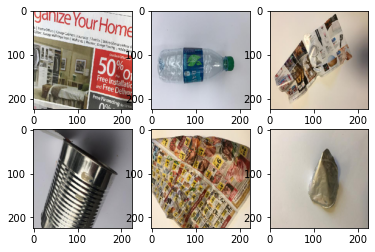

In [7]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
base_path = './Garbage classification/Garbage classification'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [9]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((16, 224, 224, 3), (16, 6))

In [10]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [11]:
path = 'labels.txt'
label = np.array(open(path).read().splitlines())

In [12]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

9412608/9406464 [==============================] - 1s 0us/step


In [13]:
base_model.trainable = False

In [14]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(6, activation='softmax')
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), #Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
batch_size = 32
epochs = 25
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
71/71 [==============================] - 23s 330ms/step - loss: 1.0955 - accuracy: 0.5924 - val_loss: 0.7791 - val_accuracy: 0.6607
Epoch 2/25
71/71 [==============================] - 22s 307ms/step - loss: 0.6553 - accuracy: 0.7526 - val_loss: 0.4908 - val_accuracy: 0.7946
Epoch 3/25
71/71 [==============================] - 22s 308ms/step - loss: 0.5435 - accuracy: 0.8019 - val_loss: 0.5789 - val_accuracy: 0.8125
Epoch 4/25
71/71 [==============================] - 22s 306ms/step - loss: 0.5209 - accuracy: 0.8213 - val_loss: 0.5574 - val_accuracy: 0.7589
Epoch 5/25
71/71 [==============================] - 22s 309ms/step - loss: 0.4322 - accuracy: 0.8363 - val_loss: 0.6486 - val_accuracy: 0.7768
Epoch 6/25
71/71 [==============================] - 22s 313ms/step - loss: 0.4286 - accuracy: 0.8425 - val_loss: 0.4072 - val_accuracy: 0.8482
Epoch 7/25
71/71 [==============================] - 22s 315ms/step

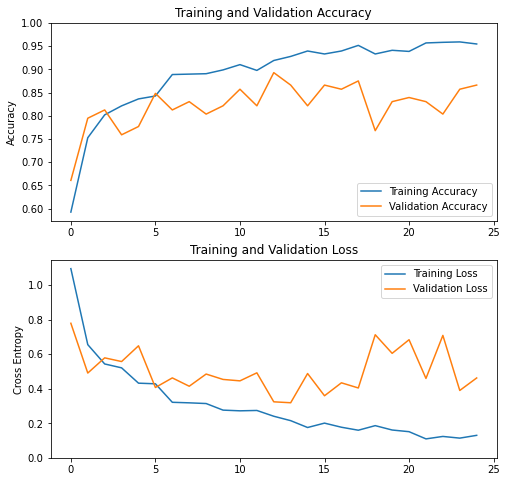

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

(1, 6)
cardboard


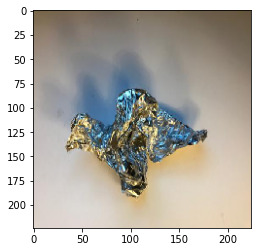

In [28]:
img_path = './Garbage classification/Garbage classification/metal/metal15.jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = label[np.argmax(p[0][0], axis=-1)]
print(predicted_class)

In [29]:
base_model.trainable = True

In [30]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  155


In [31]:
fine_tune_at = 100

In [32]:
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [34]:
history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_steps) 

Epoch 1/25
71/71 [==============================] - 41s 581ms/step - loss: 1.1480 - accuracy: 0.7171 - val_loss: 0.4606 - val_accuracy: 0.8661
Epoch 2/25
71/71 [==============================] - 39s 553ms/step - loss: 0.6124 - accuracy: 0.8034 - val_loss: 0.4995 - val_accuracy: 0.8125
Epoch 3/25
71/71 [==============================] - 41s 572ms/step - loss: 0.7212 - accuracy: 0.7696 - val_loss: 0.5608 - val_accuracy: 0.8125
Epoch 4/25
71/71 [==============================] - 42s 587ms/step - loss: 0.5125 - accuracy: 0.8301 - val_loss: 0.5965 - val_accuracy: 0.8214
Epoch 5/25
71/71 [==============================] - 44s 615ms/step - loss: 0.4770 - accuracy: 0.8380 - val_loss: 0.5682 - val_accuracy: 0.7857
Epoch 6/25
71/71 [==============================] - 43s 606ms/step - loss: 0.4239 - accuracy: 0.8504 - val_loss: 0.3338 - val_accuracy: 0.8750
Epoch 7/25
71/71 [==============================] - 43s 600ms/step - loss: 0.3586 - accuracy: 0.8715 - val_loss: 0.4207 - val_accuracy: 0.8661

In [35]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

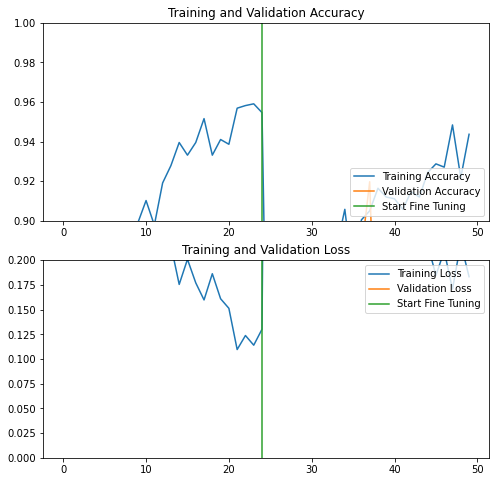

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
saved_model_dir = './'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./assets


In [38]:
import PIL.Image as Image

(1, 6)
3


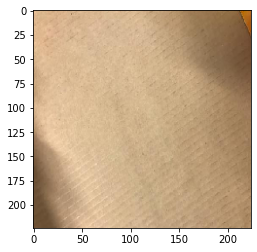

In [48]:
img_path = './Garbage classification/Garbage classification/cardboard/cardboard30.jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = np.argmax(p[0], axis=-1)
print(predicted_class)